# Importing The Libraries #

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data Preprocessing 

In [2]:
dataset = '../Data/Processed/2025/data_2025.csv'

df = pd.read_csv(dataset)
df

date  steps  calories_burned  distance_km  sleep_hours  \
0       2025-01-01  24922          2552.51        10.70          9.1   
1       2025-01-01   9738          2814.71         6.31          4.4   
2       2025-01-01  14558          2998.42        17.69          3.1   
3       2025-01-01  29924          3911.25        15.89          7.6   
4       2025-01-01  22857          2213.75         6.79          5.9   
...            ...    ...              ...          ...          ...   
230416  2025-09-26  21883          1711.42         4.62          7.9   
230417  2025-09-26  15451          3961.63         1.93          7.4   
230418  2025-09-26  17912          3604.77         5.81          7.1   
230419  2025-09-26  10072          2724.34         7.42          6.0   
230420  2025-09-26  29516          3713.99         6.70          5.2   

        heart_rate_avg workout_type weather_conditions      mood  
0                  170      Cycling               Rain  Stressed  
1                  118      Cycling               Snow   Neutral  
2                  110      Running                Fog     Tired  
3                  124         Yoga                Fog     Happy  
4                   84      Walking               Snow   Neutral  
...                ...          ...                ...       ...  
230416             174      Running                Fog     Tired  
230417             161      Cycling              Clear     Tired  
230418              74     Swimming                Fog   Neutral  
230419              74     Swimming               Snow     Tired  
230420             116         Yoga              Clear     Tired  

[230421 rows x 9 columns]

***Splitting The Dataset Based On Workout Type***

In [3]:
# Get unique workout types
unique_workout_types = df['workout_type'].unique()

# Loop through each unique workout type and create a DataFrame
for workout_type in unique_workout_types:
    # Create a valid variable name (replace spaces with underscores)
    variable_name = f"{workout_type.replace(' ', '_')}_df"
    
    # Create the DataFrame using exec
    exec(f"{variable_name} = df[df['workout_type'] == '{workout_type}'].reset_index(drop=True)")
    
    # Print the DataFrame using exec
    exec(f"print('{variable_name}')")  # Print the variable name


Cycling_df
Running_df
Yoga_df
Walking_df
Swimming_df
Gym_Workout_df


***Grouping Into Month Wise***

**Walking**

In [4]:
Walking_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38403.000000     38403.000000  38403.000000  38403.000000   
mean   14920.072390      2753.393867     10.005162      6.007734   
std     8675.878733       725.997610      5.768110      3.466562   
min        0.000000      1500.000000      0.000000      0.000000   
25%     7364.000000      2121.645000      5.020000      3.000000   
50%    14841.000000      2752.120000     10.010000      6.000000   
75%    22455.500000      3392.540000     14.980000      9.000000   
max    29999.000000      3999.940000     20.000000     12.000000   

       heart_rate_avg  
count    38403.000000  
mean       119.167825  
std         34.675108  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        149.000000  
max        179.000000

In [5]:
Walking_df['date'] = pd.to_datetime(Walking_df['date'])
Walking_df['month_name'] = Walking_df['date'].dt.strftime('%B')
Walking_df = Walking_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Walking_df.columns if col != 'month_name']
Walking_df = Walking_df[columns_order]
Walking_df = Walking_df.rename(columns={'month_name' : 'month'})
Walking_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January  22857          2213.75         6.79          5.9   
1        January  16716          3827.25        14.48          9.7   
2        January  17979          3327.53         4.84         10.1   
3        January   8834          3847.77        17.48          4.4   
4        January  17350          2350.85        14.30          9.1   
...          ...    ...              ...          ...          ...   
38398  September   8877          2765.92        17.69          1.1   
38399  September  26126          3383.01         0.69          3.1   
38400  September  27201          2495.09        13.05          4.7   
38401  September   6976          1938.56        19.92          7.1   
38402  September   6344          3487.90        11.63          9.5   

       heart_rate_avg workout_type weather_conditions      mood  
0                  84      Walking               Snow   Neutral  
1                  89      Walking                Fog   Neutral  
2                  66      Walking               Rain     Happy  
3                 130      Walking               Snow     Tired  
4                 102      Walking                Fog   Neutral  
...               ...          ...                ...       ...  
38398             174      Walking              Clear  Stressed  
38399             122      Walking               Snow  Stressed  
38400             140      Walking              Clear   Neutral  
38401              78      Walking               Rain     Tired  
38402              79      Walking               Snow   Neutral  

[38403 rows x 9 columns]

In [6]:
grouped_walking_df = Walking_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_walking_df = grouped_walking_df.reset_index()
grouped_walking_df


month         steps  calories_burned  distance_km  sleep_hours  \
0      April  15074.455581      2753.263063     9.879988     6.052953   
1     August  14894.495357      2757.511311    10.033724     5.950578   
2   February  14947.225636      2741.286593    10.116512     6.049005   
3    January  14935.205013      2748.196390    10.040949     6.009937   
4       July  14951.865970      2750.474026     9.838523     5.998351   
5       June  14942.145814      2748.649186    10.063365     6.046837   
6      March  14824.653293      2755.078487    10.026923     5.938421   
7        May  14957.248101      2778.055876    10.012090     5.998734   
8  September  14736.370051      2745.791985    10.044829     6.038271   

   heart_rate_avg weather_conditions      mood  
0      118.170465                Fog     Happy  
1      119.417894              Clear     Tired  
2      119.073533               Rain     Tired  
3      118.729857                Fog  Stressed  
4      120.739373                Fog  Stressed  
5      118.686047              Clear   Neutral  
6      118.929132               Rain   Neutral  
7      119.793786               Rain  Stressed  
8      118.951522              Clear     Happy

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_walking_df['month'] = pd.Categorical(grouped_walking_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_walking_df = grouped_walking_df.sort_values(by='month')

# Reset index if needed
grouped_walking_df = grouped_walking_df.reset_index(drop=True)
grouped_walking_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  14935.205013      2748.196390    10.040949     6.009937   
1   February  14947.225636      2741.286593    10.116512     6.049005   
2      March  14824.653293      2755.078487    10.026923     5.938421   
3      April  15074.455581      2753.263063     9.879988     6.052953   
4        May  14957.248101      2778.055876    10.012090     5.998734   
5       June  14942.145814      2748.649186    10.063365     6.046837   
6       July  14951.865970      2750.474026     9.838523     5.998351   
7     August  14894.495357      2757.511311    10.033724     5.950578   
8  September  14736.370051      2745.791985    10.044829     6.038271   

   heart_rate_avg weather_conditions      mood  
0      118.729857                Fog  Stressed  
1      119.073533               Rain     Tired  
2      118.929132               Rain   Neutral  
3      118.170465                Fog     Happy  
4      119.793786               Rain  Stressed  
5      118.686047              Clear   Neutral  
6      120.739373                Fog  Stressed  
7      119.417894              Clear     Tired  
8      118.951522              Clear     Happy

**Cycling** 

In [8]:
Cycling_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38302.000000     38302.000000  38302.000000  38302.000000   
mean   14835.973996      2753.476904      9.988908      6.037465   
std     8678.106798       721.481204      5.771072      3.475423   
min        0.000000      1500.010000      0.000000      0.000000   
25%     7291.250000      2122.520000      4.970000      3.000000   
50%    14728.500000      2756.705000      9.960000      6.050000   
75%    22292.750000      3377.662500     14.950000      9.100000   
max    29999.000000      3999.810000     20.000000     12.000000   

       heart_rate_avg  
count    38302.000000  
mean       119.563052  
std         34.659517  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        150.000000  
max        179.000000

In [9]:
Cycling_df['date'] = pd.to_datetime(Cycling_df['date'])
Cycling_df['month_name'] = Cycling_df['date'].dt.strftime('%B')
Cycling_df = Cycling_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Cycling_df.columns if col != 'month_name']
Cycling_df = Cycling_df[columns_order]
Cycling_df = Cycling_df.rename(columns={'month_name' : 'month'})
Cycling_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January  24922          2552.51        10.70          9.1   
1        January   9738          2814.71         6.31          4.4   
2        January  24597          2061.21         0.25          4.8   
3        January    300          1640.25        14.65          0.7   
4        January  22260          3764.18        11.20         11.0   
...          ...    ...              ...          ...          ...   
38297  September    695          1509.89         4.94         10.3   
38298  September  11059          2032.89        12.56          0.5   
38299  September   9836          3139.80        14.22         11.5   
38300  September   8070          2210.74         5.20         11.7   
38301  September  15451          3961.63         1.93          7.4   

       heart_rate_avg workout_type weather_conditions      mood  
0                 170      Cycling               Rain  Stressed  
1                 118      Cycling               Snow   Neutral  
2                 170      Cycling              Clear  Stressed  
3                 132      Cycling                Fog  Stressed  
4                  97      Cycling               Rain  Stressed  
...               ...          ...                ...       ...  
38297              75      Cycling               Snow  Stressed  
38298             126      Cycling               Rain   Neutral  
38299              92      Cycling                Fog     Tired  
38300             117      Cycling               Snow     Tired  
38301             161      Cycling              Clear     Tired  

[38302 rows x 9 columns]

In [10]:
grouped_cycling_df = Cycling_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_cycling_df = grouped_cycling_df.reset_index()
grouped_cycling_df

month         steps  calories_burned  distance_km  sleep_hours  \
0      April  14950.452742      2767.301078    10.036929     6.008728   
1     August  14900.251614      2763.880655     9.956102     6.066720   
2   February  14904.857250      2749.135553     9.983112     6.009417   
3    January  14871.329818      2736.791862     9.995531     6.091474   
4       July  14949.825208      2745.929366     9.909348     5.968996   
5       June  14920.504581      2757.181724     9.910853     6.053042   
6      March  14821.900911      2746.016583    10.030057     6.076333   
7        May  14601.577873      2757.099123    10.026719     6.058999   
8  September  14572.386488      2759.460771    10.062071     5.993709   

   heart_rate_avg weather_conditions      mood  
0      119.798366                Fog     Happy  
1      119.495387                Fog  Stressed  
2      119.801196              Clear  Stressed  
3      119.698228                Fog  Stressed  
4      119.567064               Snow     Happy  
5      119.345549                Fog     Happy  
6      119.235308               Rain   Neutral  
7      119.684470                Fog  Stressed  
8      119.435175              Clear  Stressed

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_cycling_df['month'] = pd.Categorical(grouped_cycling_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_cycling_df = grouped_cycling_df.sort_values(by='month')

# Reset index if needed
grouped_cycling_df = grouped_cycling_df.reset_index(drop=True)
grouped_cycling_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  14871.329818      2736.791862     9.995531     6.091474   
1   February  14904.857250      2749.135553     9.983112     6.009417   
2      March  14821.900911      2746.016583    10.030057     6.076333   
3      April  14950.452742      2767.301078    10.036929     6.008728   
4        May  14601.577873      2757.099123    10.026719     6.058999   
5       June  14920.504581      2757.181724     9.910853     6.053042   
6       July  14949.825208      2745.929366     9.909348     5.968996   
7     August  14900.251614      2763.880655     9.956102     6.066720   
8  September  14572.386488      2759.460771    10.062071     5.993709   

   heart_rate_avg weather_conditions      mood  
0      119.698228                Fog  Stressed  
1      119.801196              Clear  Stressed  
2      119.235308               Rain   Neutral  
3      119.798366                Fog     Happy  
4      119.684470                Fog  Stressed  
5      119.345549                Fog     Happy  
6      119.567064               Snow     Happy  
7      119.495387                Fog  Stressed  
8      119.435175              Clear  Stressed

**Yoga**

In [12]:
Yoga_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38369.000000     38369.000000  38369.000000  38369.000000   
mean   15035.810159      2747.308511      9.958802      5.989320   
std     8622.341605       721.690413      5.771749      3.463365   
min        3.000000      1500.040000      0.000000      0.000000   
25%     7577.000000      2118.150000      4.980000      3.000000   
50%    15150.000000      2746.710000      9.910000      6.000000   
75%    22496.000000      3372.810000     14.940000      9.000000   
max    29999.000000      3999.990000     20.000000     12.000000   

       heart_rate_avg  
count    38369.000000  
mean       119.418098  
std         34.592018  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        149.000000  
max        179.000000

In [13]:
Yoga_df['date'] = pd.to_datetime(Yoga_df['date'])
Yoga_df['month_name'] = Yoga_df['date'].dt.strftime('%B')
Yoga_df = Yoga_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Yoga_df.columns if col != 'month_name']
Yoga_df = Yoga_df[columns_order]
Yoga_df = Yoga_df.rename(columns={'month_name' : 'month'})
Yoga_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January  29924          3911.25        15.89          7.6   
1        January   9719          2319.90         9.62         11.3   
2        January  13680          3311.48        12.77          8.8   
3        January  18082          3301.29         3.66          9.1   
4        January   2776          1980.88         3.16         11.4   
...          ...    ...              ...          ...          ...   
38364  September  21674          3464.86         3.44         11.4   
38365  September  10658          3220.40         7.26          0.6   
38366  September  10972          1800.93         3.08          2.3   
38367  September  16518          3707.42         5.48         11.1   
38368  September  29516          3713.99         6.70          5.2   

       heart_rate_avg workout_type weather_conditions      mood  
0                 124         Yoga                Fog     Happy  
1                  66         Yoga                Fog     Happy  
2                 160         Yoga               Rain     Happy  
3                 172         Yoga              Clear   Neutral  
4                  86         Yoga               Snow     Happy  
...               ...          ...                ...       ...  
38364              85         Yoga               Snow     Happy  
38365             105         Yoga               Snow     Tired  
38366             167         Yoga                Fog  Stressed  
38367             144         Yoga               Snow     Happy  
38368             116         Yoga              Clear     Tired  

[38369 rows x 9 columns]

In [14]:
grouped_yoga_df = Yoga_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_yoga_df = grouped_yoga_df.reset_index()
grouped_yoga_df

month         steps  calories_burned  distance_km  sleep_hours  \
0      April  14884.309052      2746.454050     9.872174     5.997100   
1     August  15154.600814      2749.914763     9.892030     5.982776   
2   February  15009.055345      2745.426394    10.123958     5.917690   
3    January  15018.079798      2741.565611     9.901951     5.977849   
4       July  14900.588444      2740.881550     9.924485     6.035200   
5       June  15277.963941      2745.607200    10.036380     5.995728   
6      March  14951.347816      2757.525683     9.943805     5.961445   
7        May  15126.152263      2746.903283    10.051877     5.938820   
8  September  14990.942925      2752.118110     9.887916     6.105336   

   heart_rate_avg weather_conditions      mood  
0      120.272513              Clear   Neutral  
1      119.652125               Rain     Tired  
2      119.443012               Snow   Neutral  
3      119.025682                Fog     Tired  
4      119.723046               Snow     Happy  
5      119.606798              Clear   Neutral  
6      119.608278                Fog  Stressed  
7      118.069959                Fog     Tired  
8      119.370056                Fog  Stressed

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_yoga_df['month'] = pd.Categorical(grouped_yoga_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_yoga_df = grouped_yoga_df.sort_values(by='month')

# Reset index if needed
grouped_yoga_df = grouped_yoga_df.reset_index(drop=True)
grouped_yoga_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  15018.079798      2741.565611     9.901951     5.977849   
1   February  15009.055345      2745.426394    10.123958     5.917690   
2      March  14951.347816      2757.525683     9.943805     5.961445   
3      April  14884.309052      2746.454050     9.872174     5.997100   
4        May  15126.152263      2746.903283    10.051877     5.938820   
5       June  15277.963941      2745.607200    10.036380     5.995728   
6       July  14900.588444      2740.881550     9.924485     6.035200   
7     August  15154.600814      2749.914763     9.892030     5.982776   
8  September  14990.942925      2752.118110     9.887916     6.105336   

   heart_rate_avg weather_conditions      mood  
0      119.025682                Fog     Tired  
1      119.443012               Snow   Neutral  
2      119.608278                Fog  Stressed  
3      120.272513              Clear   Neutral  
4      118.069959                Fog     Tired  
5      119.606798              Clear   Neutral  
6      119.723046               Snow     Happy  
7      119.652125               Rain     Tired  
8      119.370056                Fog  Stressed

**Swimming**

In [16]:
Swimming_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38537.000000     38537.000000  38537.000000  38537.000000   
mean   15102.948439      2756.602887      9.982107      6.005522   
std     8673.505879       722.652456      5.781651      3.465977   
min        0.000000      1500.040000      0.000000      0.000000   
25%     7609.000000      2131.880000      4.980000      3.000000   
50%    15134.000000      2766.610000      9.930000      6.000000   
75%    22707.000000      3385.770000     14.980000      9.000000   
max    29999.000000      3999.950000     20.000000     12.000000   

       heart_rate_avg  
count    38537.000000  
mean       119.321146  
std         34.709020  
min         60.000000  
25%         89.000000  
50%        119.000000  
75%        150.000000  
max        179.000000

In [17]:
Swimming_df['date'] = pd.to_datetime(Swimming_df['date'])
Swimming_df['month_name'] = Swimming_df['date'].dt.strftime('%B')
Swimming_df = Swimming_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Swimming_df.columns if col != 'month_name']
Swimming_df = Swimming_df[columns_order]
Swimming_df = Swimming_df.rename(columns={'month_name' : 'month'})
Swimming_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January  23824          2017.69         4.59          6.0   
1        January  26144          2469.43        14.10          7.9   
2        January   9513          1516.32         4.46          4.3   
3        January  21741          1727.15        16.69          6.4   
4        January  21569          3568.21        10.05          4.9   
...          ...    ...              ...          ...          ...   
38532  September  15628          2127.89        14.65          8.8   
38533  September  12265          2520.25        16.52          0.7   
38534  September  26925          3431.51        17.50          2.9   
38535  September  17912          3604.77         5.81          7.1   
38536  September  10072          2724.34         7.42          6.0   

       heart_rate_avg workout_type weather_conditions     mood  
0                 178     Swimming              Clear  Neutral  
1                 107     Swimming               Rain  Neutral  
2                 106     Swimming               Snow    Happy  
3                 141     Swimming                Fog    Tired  
4                 146     Swimming                Fog  Neutral  
...               ...          ...                ...      ...  
38532             106     Swimming               Rain    Happy  
38533             112     Swimming               Rain  Neutral  
38534             155     Swimming               Rain  Neutral  
38535              74     Swimming                Fog  Neutral  
38536              74     Swimming               Snow    Tired  

[38537 rows x 9 columns]

In [18]:
grouped_swimming_df = Swimming_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_swimming_df = grouped_swimming_df.reset_index()
grouped_swimming_df

month         steps  calories_burned  distance_km  sleep_hours  \
0      April  14834.888252      2762.490306    10.023902     5.984408   
1     August  15161.708220      2735.695509    10.047493     6.065191   
2   February  15145.355857      2751.104313     9.936158     5.938742   
3    January  15249.750907      2763.290887    10.028147     6.016583   
4       July  15193.482316      2779.441543     9.950840     5.993084   
5       June  15112.296218      2768.534477    10.010572     6.085061   
6      March  14962.601252      2751.335677     9.848885     5.962651   
7        May  15031.244290      2746.378558    10.039313     6.088603   
8  September  15247.229379      2750.571786     9.950110     5.896308   

   heart_rate_avg weather_conditions      mood  
0      119.771490                Fog  Stressed  
1      120.268392               Snow     Happy  
2      118.730210               Snow  Stressed  
3      119.380672              Clear   Neutral  
4      119.330255               Snow     Happy  
5      119.513072               Snow     Happy  
6      119.082253                Fog     Happy  
7      118.835871              Clear     Tired  
8      118.915161                Fog   Neutral

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_swimming_df['month'] = pd.Categorical(grouped_swimming_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_swimming_df = grouped_swimming_df.sort_values(by='month')

# Reset index if needed
grouped_swimming_df = grouped_swimming_df.reset_index(drop=True)
grouped_swimming_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  15249.750907      2763.290887    10.028147     6.016583   
1   February  15145.355857      2751.104313     9.936158     5.938742   
2      March  14962.601252      2751.335677     9.848885     5.962651   
3      April  14834.888252      2762.490306    10.023902     5.984408   
4        May  15031.244290      2746.378558    10.039313     6.088603   
5       June  15112.296218      2768.534477    10.010572     6.085061   
6       July  15193.482316      2779.441543     9.950840     5.993084   
7     August  15161.708220      2735.695509    10.047493     6.065191   
8  September  15247.229379      2750.571786     9.950110     5.896308   

   heart_rate_avg weather_conditions      mood  
0      119.380672              Clear   Neutral  
1      118.730210               Snow  Stressed  
2      119.082253                Fog     Happy  
3      119.771490                Fog  Stressed  
4      118.835871              Clear     Tired  
5      119.513072               Snow     Happy  
6      119.330255               Snow     Happy  
7      120.268392               Snow     Happy  
8      118.915161                Fog   Neutral

**Gym_Workout**

In [20]:
Gym_Workout_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38554.000000     38554.000000  38554.000000  38554.000000   
mean   15057.482751      2753.748117     10.032002      5.983434   
std     8608.464844       720.193270      5.779362      3.474603   
min        0.000000      1500.020000      0.000000      0.000000   
25%     7632.250000      2133.587500      5.030000      3.000000   
50%    15066.000000      2755.680000     10.000000      6.000000   
75%    22492.500000      3373.565000     15.060000      9.000000   
max    29998.000000      3999.940000     20.000000     12.000000   

       heart_rate_avg  
count    38554.000000  
mean       119.900374  
std         34.678433  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        150.000000  
max        179.000000

In [21]:
Gym_Workout_df['date'] = pd.to_datetime(Gym_Workout_df['date'])
Gym_Workout_df['month_name'] = Gym_Workout_df['date'].dt.strftime('%B')
Gym_Workout_df = Gym_Workout_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Gym_Workout_df.columns if col != 'month_name']
Gym_Workout_df = Gym_Workout_df[columns_order]
Gym_Workout_df = Gym_Workout_df.rename(columns={'month_name' : 'month'})
Gym_Workout_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January   7144          3744.93        18.74          2.4   
1        January  19107          1690.01        15.27         11.6   
2        January   2407          2876.80         0.56          3.8   
3        January  14775          3102.95        16.65          8.2   
4        January  15975          2944.34         8.19          5.1   
...          ...    ...              ...          ...          ...   
38549  September  14751          1722.83        10.18          9.8   
38550  September   8132          1704.99         2.98          6.5   
38551  September  25748          1541.30         1.30          4.6   
38552  September  28120          3092.58         3.71          3.0   
38553  September  23149          2454.79         4.80          7.9   

       heart_rate_avg workout_type weather_conditions      mood  
0                  60  Gym Workout              Clear  Stressed  
1                  89  Gym Workout              Clear   Neutral  
2                 104  Gym Workout                Fog     Tired  
3                 105  Gym Workout                Fog     Tired  
4                 174  Gym Workout               Snow  Stressed  
...               ...          ...                ...       ...  
38549             178  Gym Workout              Clear     Tired  
38550             120  Gym Workout                Fog     Happy  
38551             169  Gym Workout                Fog   Neutral  
38552             160  Gym Workout              Clear     Happy  
38553             159  Gym Workout               Rain     Happy  

[38554 rows x 9 columns]

In [22]:
grouped_gym_workout_df = Gym_Workout_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_gym_workout_df = grouped_gym_workout_df.reset_index()
grouped_gym_workout_df

month         steps  calories_burned  distance_km  sleep_hours  \
0      April  15074.929293      2756.779852     9.935386     6.033098   
1     August  15112.347385      2746.676526    10.033860     6.090753   
2   February  15171.861452      2751.704606    10.009241     5.930828   
3    January  15076.733827      2735.976736    10.128001     5.957974   
4       July  15075.314704      2743.114819    10.077804     5.956931   
5       June  15063.018236      2762.904388    10.084818     5.937650   
6      March  14983.949023      2748.792922     9.954559     5.990052   
7        May  14894.859248      2769.178171    10.035095     5.949479   
8  September  15080.356061      2772.286093    10.021296     5.999567   

   heart_rate_avg weather_conditions      mood  
0      118.942213                Fog  Stressed  
1      119.395718              Clear     Tired  
2      120.087168               Snow   Neutral  
3      120.224169               Rain     Happy  
4      120.706143               Rain   Neutral  
5      119.513158                Fog   Neutral  
6      120.251516               Rain   Neutral  
7      119.567316              Clear     Happy  
8      120.480249               Snow  Stressed

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_gym_workout_df['month'] = pd.Categorical(grouped_gym_workout_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_gym_workout_df = grouped_gym_workout_df.sort_values(by='month')

# Reset index if needed
grouped_gym_workout_df = grouped_gym_workout_df.reset_index(drop=True)
grouped_gym_workout_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  15076.733827      2735.976736    10.128001     5.957974   
1   February  15171.861452      2751.704606    10.009241     5.930828   
2      March  14983.949023      2748.792922     9.954559     5.990052   
3      April  15074.929293      2756.779852     9.935386     6.033098   
4        May  14894.859248      2769.178171    10.035095     5.949479   
5       June  15063.018236      2762.904388    10.084818     5.937650   
6       July  15075.314704      2743.114819    10.077804     5.956931   
7     August  15112.347385      2746.676526    10.033860     6.090753   
8  September  15080.356061      2772.286093    10.021296     5.999567   

   heart_rate_avg weather_conditions      mood  
0      120.224169               Rain     Happy  
1      120.087168               Snow   Neutral  
2      120.251516               Rain   Neutral  
3      118.942213                Fog  Stressed  
4      119.567316              Clear     Happy  
5      119.513158                Fog   Neutral  
6      120.706143               Rain   Neutral  
7      119.395718              Clear     Tired  
8      120.480249               Snow  Stressed

**Running**

In [24]:
Running_df.describe()


steps  calories_burned   distance_km   sleep_hours  \
count  38256.000000     38256.000000  38256.000000  38256.000000   
mean   14983.383339      2748.091793      9.996969      6.006114   
std     8673.836734       719.955098      5.767836      3.457183   
min        0.000000      1500.110000      0.000000      0.000000   
25%     7439.500000      2126.487500      5.000000      3.000000   
50%    14960.000000      2744.765000     10.000000      6.000000   
75%    22525.000000      3370.565000     15.000000      9.000000   
max    29999.000000      3999.860000     20.000000     12.000000   

       heart_rate_avg  
count    38256.000000  
mean       119.617968  
std         34.622686  
min         60.000000  
25%         90.000000  
50%        120.000000  
75%        150.000000  
max        179.000000

In [25]:
Running_df['date'] = pd.to_datetime(Running_df['date'])
Running_df['month_name'] = Running_df['date'].dt.strftime('%B')
Running_df = Running_df.drop(columns='date')
columns_order = ['month_name'] + [col for col in Running_df.columns if col != 'month_name']
Running_df = Running_df[columns_order]
Running_df = Running_df.rename(columns={'month_name' : 'month'})
Running_df

month  steps  calories_burned  distance_km  sleep_hours  \
0        January  14558          2998.42        17.69          3.1   
1        January   8352          3816.83        10.21          0.9   
2        January   3126          3875.48        16.42          5.8   
3        January  11661          2946.94         1.59          6.7   
4        January  19497          2988.30         3.06          9.6   
...          ...    ...              ...          ...          ...   
38251  September   3888          3472.40         4.18          8.0   
38252  September  26459          1695.20         5.67          8.3   
38253  September   6294          2309.35         9.15         11.7   
38254  September    540          3171.16        11.18          8.0   
38255  September  21883          1711.42         4.62          7.9   

       heart_rate_avg workout_type weather_conditions      mood  
0                 110      Running                Fog     Tired  
1                  89      Running                Fog     Happy  
2                  76      Running              Clear     Tired  
3                  85      Running              Clear   Neutral  
4                 107      Running                Fog   Neutral  
...               ...          ...                ...       ...  
38251             132      Running               Rain   Neutral  
38252             134      Running               Rain     Happy  
38253              99      Running              Clear   Neutral  
38254             177      Running                Fog  Stressed  
38255             174      Running                Fog     Tired  

[38256 rows x 9 columns]

In [26]:
grouped_running_df = Running_df.groupby('month').agg({
    'steps': 'mean',                        # Calculate mean for numerical column
    'calories_burned': 'mean',              # Calculate mean for numerical column
    'distance_km' : 'mean',
    'sleep_hours' : 'mean',
    'heart_rate_avg' : 'mean',
    'weather_conditions': lambda x: x.mode()[0],  # Use the most frequent value for categorical column
    'mood' : lambda x : x.mode()[0]
})
grouped_running_df = grouped_running_df.reset_index()
grouped_running_df

month         steps  calories_burned  distance_km  sleep_hours  \
0      April  14795.240264      2745.375753    10.135163     5.970508   
1     August  15045.411341      2758.283670    10.008571     5.978555   
2   February  14952.481272      2733.884776     9.942459     6.000912   
3    January  14763.599639      2749.089973     9.923724     5.936136   
4       July  14911.379279      2746.747314     9.861819     6.017435   
5       June  15143.455505      2743.419254     9.950185     6.008587   
6      March  15094.757370      2748.196390     9.986336     6.086406   
7        May  15121.474534      2751.637175    10.033641     6.102849   
8  September  15040.321811      2756.042436    10.149786     5.944691   

   heart_rate_avg weather_conditions      mood  
0      119.408335               Snow     Happy  
1      118.847885              Clear     Tired  
2      119.100789                Fog   Neutral  
3      120.258115                Fog   Neutral  
4      120.019398              Clear  Stressed  
5      119.313504               Rain  Stressed  
6      120.267899                Fog     Tired  
7      119.912497               Snow     Happy  
8      119.349520               Rain   Neutral

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_running_df['month'] = pd.Categorical(grouped_running_df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
grouped_running_df = grouped_running_df.sort_values(by='month')

# Reset index if needed
grouped_running_df = grouped_running_df.reset_index(drop=True)
grouped_running_df

month         steps  calories_burned  distance_km  sleep_hours  \
0    January  14763.599639      2749.089973     9.923724     5.936136   
1   February  14952.481272      2733.884776     9.942459     6.000912   
2      March  15094.757370      2748.196390     9.986336     6.086406   
3      April  14795.240264      2745.375753    10.135163     5.970508   
4        May  15121.474534      2751.637175    10.033641     6.102849   
5       June  15143.455505      2743.419254     9.950185     6.008587   
6       July  14911.379279      2746.747314     9.861819     6.017435   
7     August  15045.411341      2758.283670    10.008571     5.978555   
8  September  15040.321811      2756.042436    10.149786     5.944691   

   heart_rate_avg weather_conditions      mood  
0      120.258115                Fog   Neutral  
1      119.100789                Fog   Neutral  
2      120.267899                Fog     Tired  
3      119.408335               Snow     Happy  
4      119.912497               Snow     Happy  
5      119.313504               Rain  Stressed  
6      120.019398              Clear  Stressed  
7      118.847885              Clear     Tired  
8      119.349520               Rain   Neutral

# Data Visualisation

## Workout Type Analysis

In [28]:
workout_summary = df.groupby('workout_type').agg({
    'steps': 'sum',
    'calories_burned': 'sum',
    'distance_km': 'sum'
}).reset_index()


***Total Steps By Workout Type***

Text(0, 0.5, 'Total Steps')

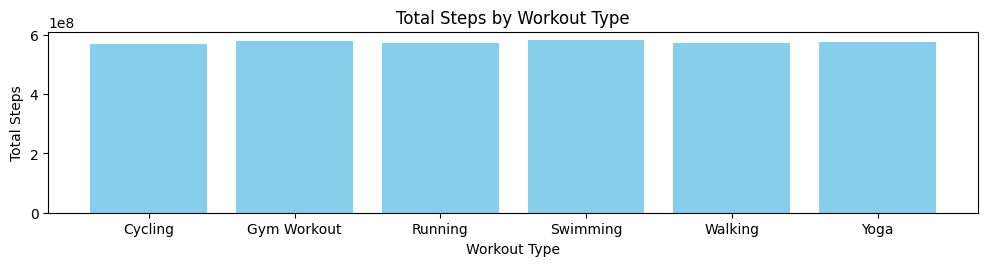

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.bar(workout_summary['workout_type'], workout_summary['steps'], color='skyblue')
plt.title('Total Steps by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Steps')

***Calories Burned vs Workout Type***

Text(0, 0.5, 'Total Calories Burned')

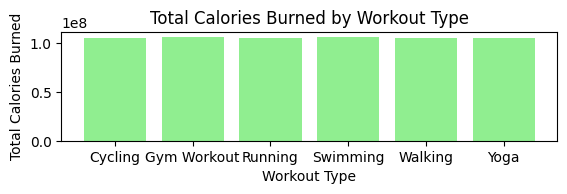

In [30]:
plt.subplot(3, 1, 2)
plt.bar(workout_summary['workout_type'], workout_summary['calories_burned'], color='lightgreen')
plt.title('Total Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Calories Burned')

Text(0, 0.5, 'Total Distance (km)')

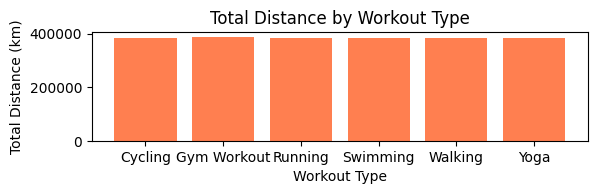

In [31]:
plt.subplot(3, 1, 3)
plt.bar(workout_summary['workout_type'], workout_summary['distance_km'], color='coral')
plt.title('Total Distance by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Total Distance (km)')

## Mood And Workout Type Correlation

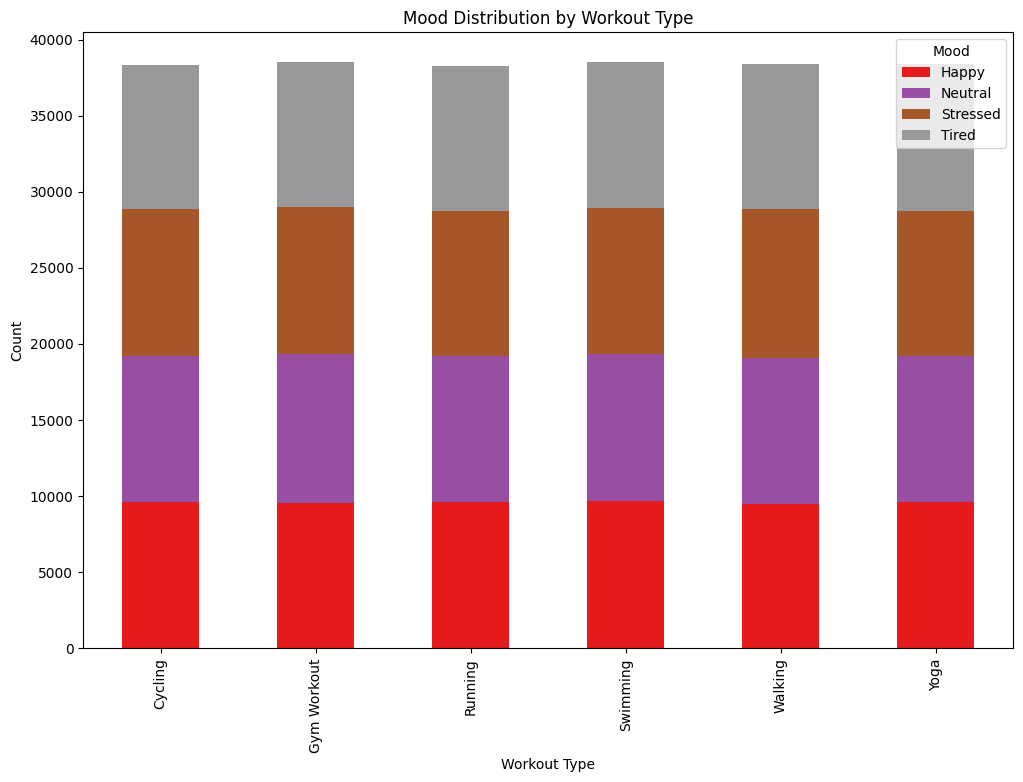

In [32]:
# Count occurrences of each mood for each workout type
mood_workout_counts = df.groupby(['workout_type', 'mood']).size().unstack()

# Plot
mood_workout_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Mood Distribution by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.show()


## Weather Condition and Workout Types

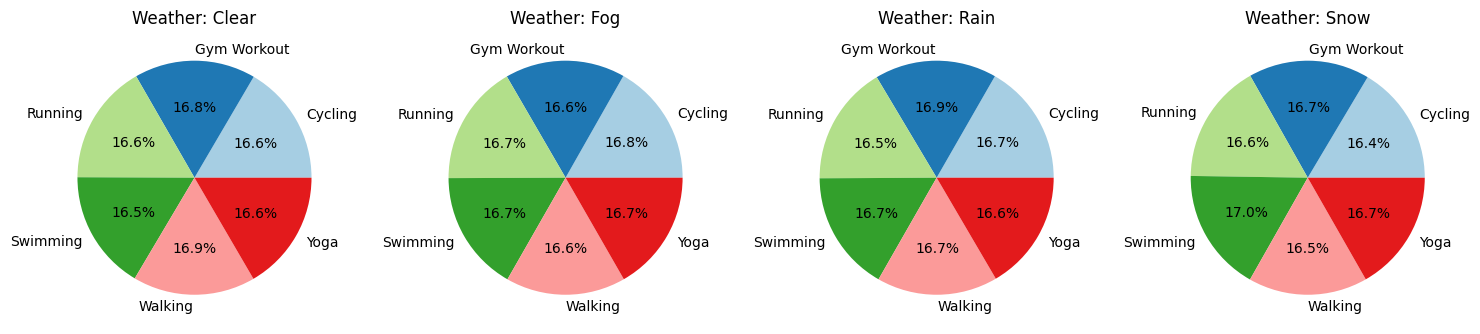

In [33]:
weather_workout_counts = df.groupby(['weather_conditions', 'workout_type']).size().unstack()

# Create subplots for each weather condition
weather_conditions = weather_workout_counts.index
num_conditions = len(weather_conditions)
fig, axes = plt.subplots(1, num_conditions, figsize=(15, 5), sharey=True)

# Plot pie charts
for ax, weather_condition in zip(axes, weather_conditions):
    sizes = weather_workout_counts.loc[weather_condition]
    ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(sizes.index))))
    ax.set_title(f'Weather: {weather_condition}')

plt.tight_layout()
plt.show()

## Workout Metrics vs Moods

<Figure size 1200x800 with 0 Axes>

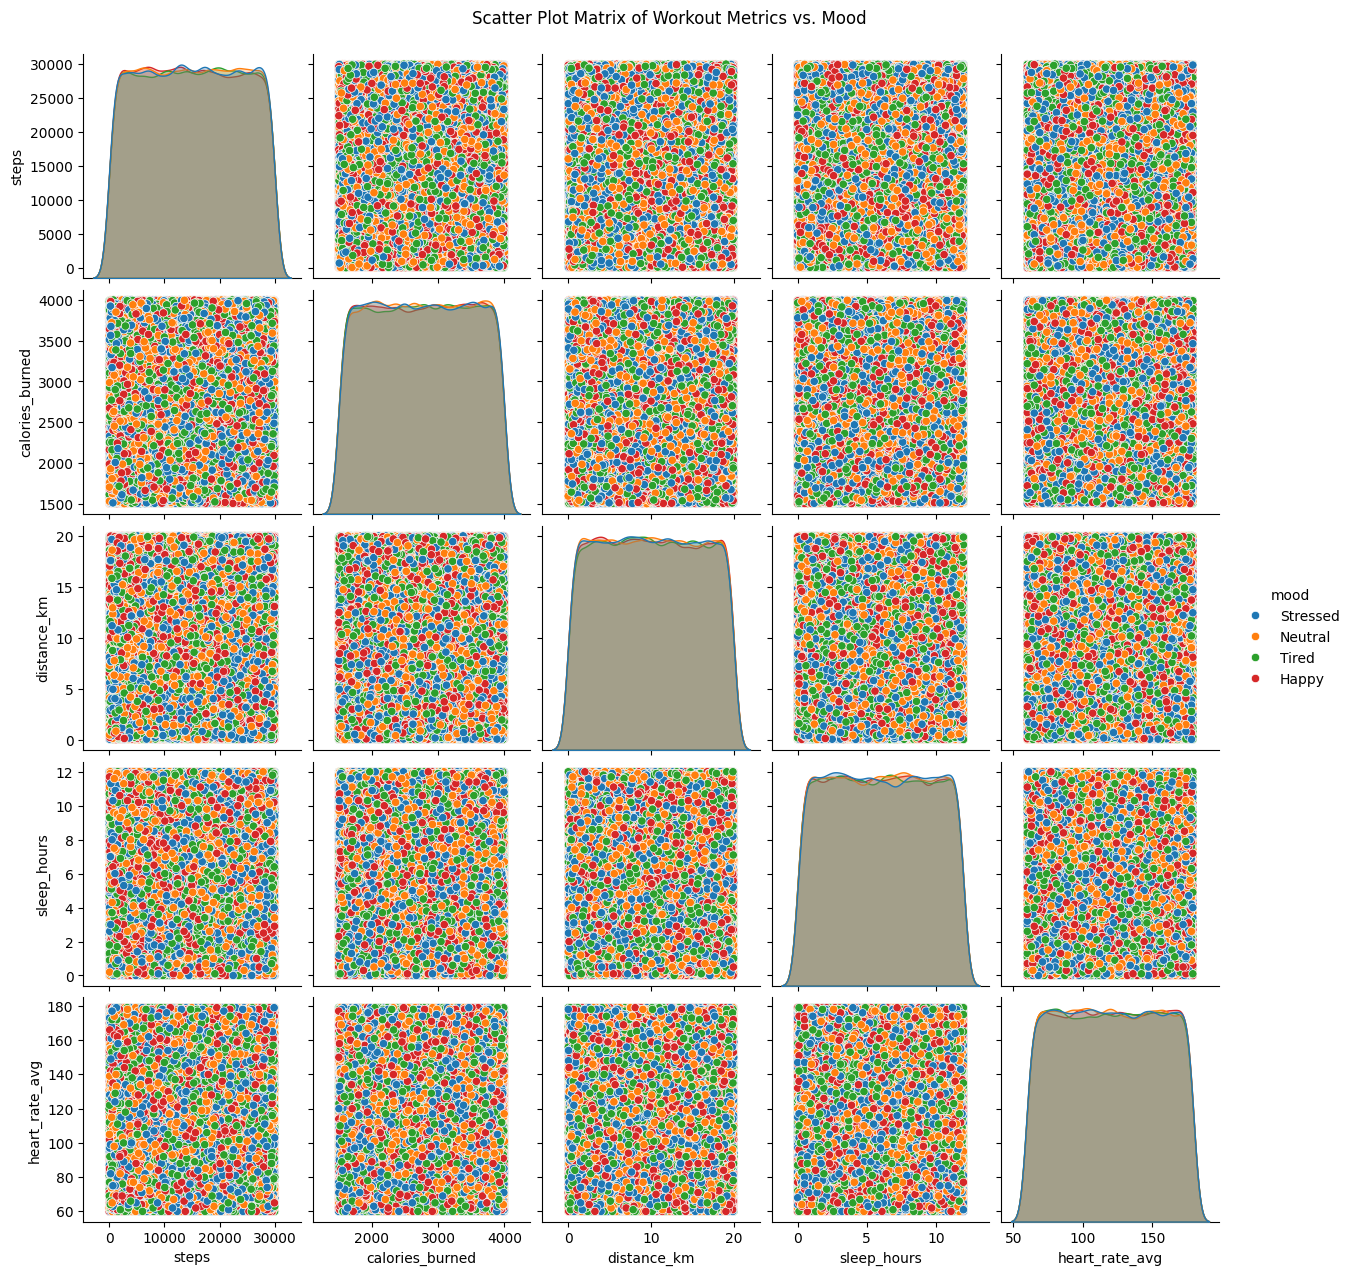

In [34]:
# Convert mood to categorical codes
df['mood_code'] = pd.Categorical(df['mood']).codes

# Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='mood', vars=['steps', 'calories_burned', 'distance_km', 'sleep_hours', 'heart_rate_avg'])
plt.suptitle('Scatter Plot Matrix of Workout Metrics vs. Mood', y=1.02)
plt.show()


## Sleep Hour Distribution

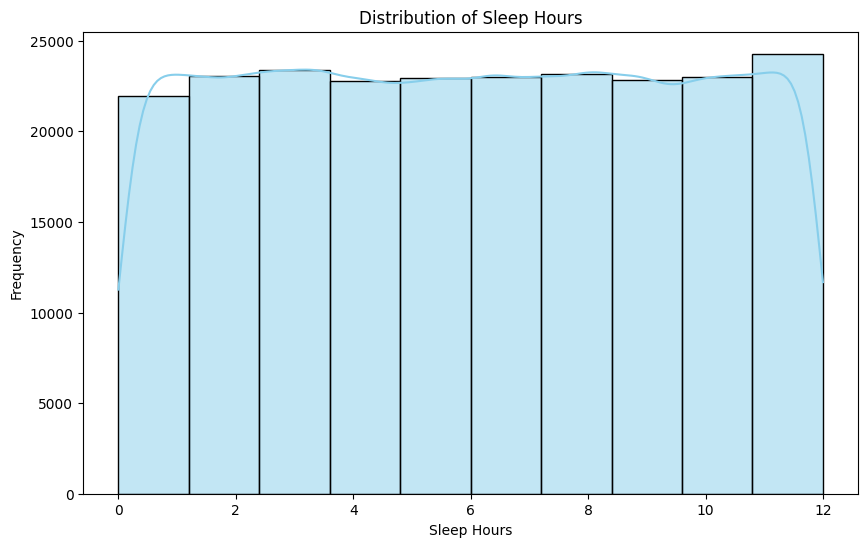

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

**Sleep Hour and Workout Metrics**

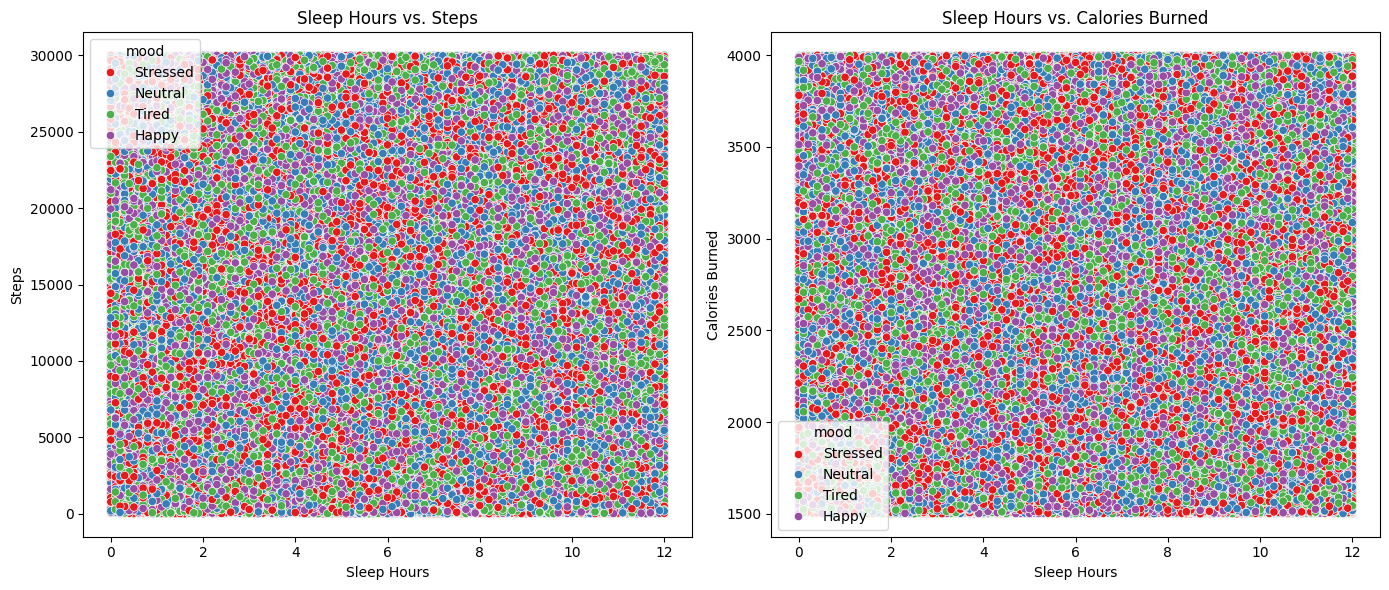

In [36]:
plt.figure(figsize=(14, 6))

# Scatter plot of Sleep Hours vs. Steps
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sleep_hours', y='steps', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Steps')
plt.xlabel('Sleep Hours')
plt.ylabel('Steps')

# Scatter plot of Sleep Hours vs. Calories Burned
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sleep_hours', y='calories_burned', hue='mood', palette='Set1')
plt.title('Sleep Hours vs. Calories Burned')
plt.xlabel('Sleep Hours')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()


**Sleep Hour And Mood**

C:\Users\santa\AppData\Local\Temp\ipykernel_29520\720433237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')


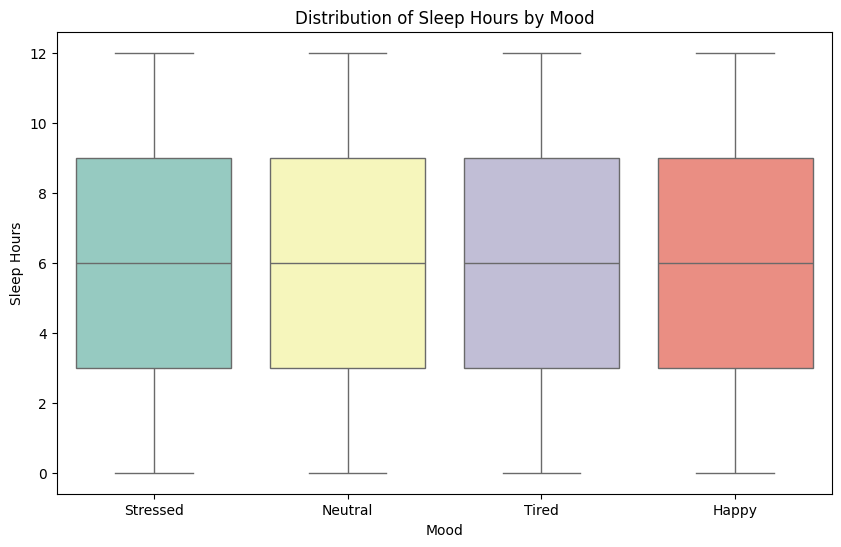

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mood', y='sleep_hours', palette='Set3')
plt.title('Distribution of Sleep Hours by Mood')
plt.xlabel('Mood')
plt.ylabel('Sleep Hours')
plt.show()


**Sleep Hours Over Time**

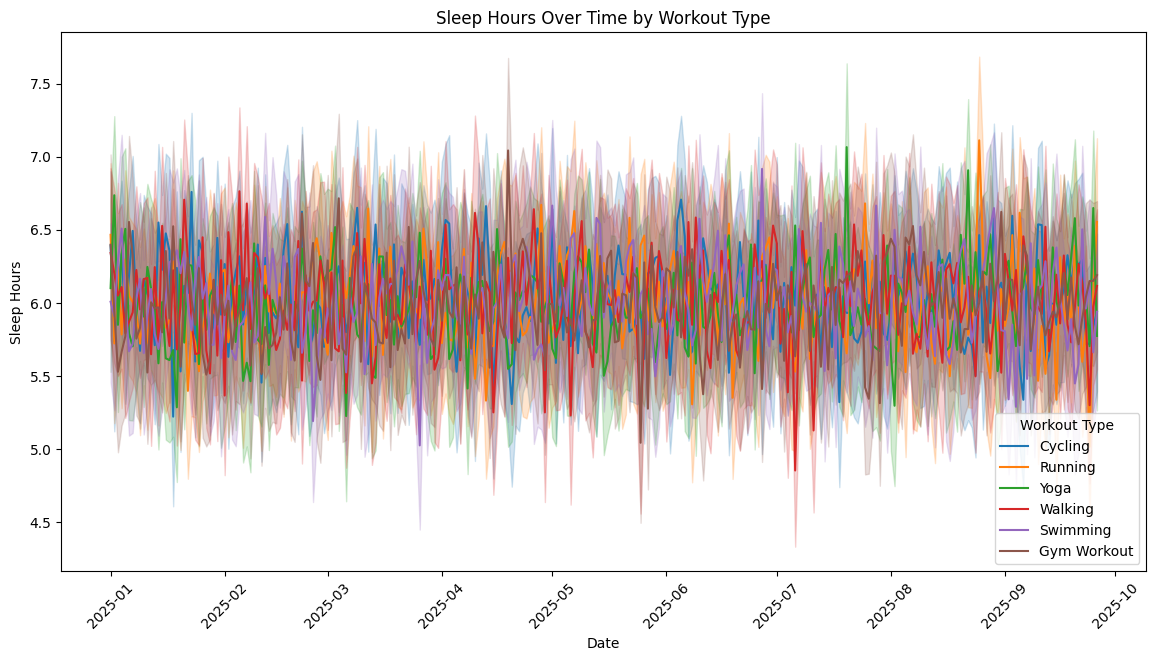

In [38]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='sleep_hours', hue='workout_type', palette='tab10')
plt.title('Sleep Hours Over Time by Workout Type')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)
plt.legend(title='Workout Type')
plt.show()


# Storing Into CSV Format

In [39]:
dfs = {
    'walking': grouped_walking_df,
    'cycling': grouped_cycling_df,
    'yoga': grouped_yoga_df,
    'gym': grouped_gym_workout_df,
    'swimming': grouped_swimming_df,
    'running': grouped_running_df
}

directory = '../Data/Processed/2025/'

# Save each DataFrame to a CSV file
for name, df in dfs.items():
    file_path = os.path.join(directory, f'{name}.csv')
    df.to_csv(file_path, index=False)
    print(f"DataFrame '{name}' has been saved to {file_path}")

DataFrame 'walking' has been saved to ../Data/Processed/2025/walking.csv
DataFrame 'cycling' has been saved to ../Data/Processed/2025/cycling.csv
DataFrame 'yoga' has been saved to ../Data/Processed/2025/yoga.csv
DataFrame 'gym' has been saved to ../Data/Processed/2025/gym.csv
DataFrame 'swimming' has been saved to ../Data/Processed/2025/swimming.csv
DataFrame 'running' has been saved to ../Data/Processed/2025/running.csv
